# Visualization

- The primary goal of visualization is to make very pretty, publication-quality figures
    - Or, _alternatively_, to facilitate understanding of data
- Understanding can be achieved in many ways, so it's helpful to have a range of different tools
- An optimal visualization environment is both efficient and flexible

    - Produce off-the-shelf high-quality plots very quickly
    - With more effort, gives you full control over the plot

### Visualization in Python

- Python provides a wide array of options
- Low-level and high-level plotting APIs
- Static images vs. HTML output vs. interactive plots
- Domain-general and domain-specific packages

**PS: Many pieces of this notebook have beens scavenged from other visualization notebooks and galleries. But the main things are from Tal Yarkoni's [visualization-in-python notebook](https://github.com/neurohackweek/visualization-in-python).**

# General Overview

In this notebook we will cover the following python packages. Some of them are exclusively for visualization while others like `Pandas` have many other purposes:

- [Matplotlib](https://matplotlib.org/)
- [Pandas](http://pandas.pydata.org/)
- [Seaborn](http://seaborn.pydata.org/)
- [Bokeh](https://bokeh.pydata.org)
- [Plotly](https://plot.ly/python/)
- [HoloViews](http://holoviews.org/)
- [Altair](https://altair-viz.github.io/)

The visualization of the first three are all based on matplotlib and use static images. While the last three create HTML outputs and allow much more interactive plots. We will talk about each one as we go along.

### Python-graph-gallery
Check out the very helpful and cool new homepage https://python-graph-gallery.com/ to see how you can create different kinds of graphs.

## Preparation

As with most things in Python, we first load the relevant packages. Here we load three important packages:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

import numpy as np

The first line in the cell above is specific to Jupyter notebooks. It tells the interpreter to capture figures and embed them in the browser. Otherwise they would end up almost in digital ether.

## The Datasets

For example purposes, we will make use of a phenotypic dataset from the [ABIDE II](http://fcon_1000.projects.nitrc.org/indi/abide/abide_II.html) consortium. This multi-site dataset contains data from individuals diagnosed with Autism Spectrum Disorder (ASD) and healthy controls. We will first load the data from a single site.

Let's read this from the Web using Pandas. We explicitly specific that missing values are noted in the dataset as `'n/a'`.

In [ ]:
df = pd.read_table('https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE2/RawData/ABIDEII-KKI_1/participants.tsv',
                  na_values=['n/a'])

In the following cell we remove all columns that have missing values.

In [ ]:
sub_df = df.dropna(axis=1)
sub_df.head()

,site_id,participant_id,dx_group,age_at_scan,sex,handedness_category,handedness_scores,viq,piq,viq_test_type,piq_test_type,nonasd_psydx_icd9code,nonasd_psydx_label,eye_status_at_scan
0,ABIDEII-KKI_1,29273,1,8.476712,1,1.0,82.0,142.0,104.0,WISC-IV,WISC-IV,314.01,ADHD combined,1.0
1,ABIDEII-KKI_1,29274,1,9.246575,1,1.0,83.0,104.0,79.0,WISC-IV,WISC-IV,296.3,MDD (past),1.0
2,ABIDEII-KKI_1,29275,1,8.646575,1,1.0,100.0,130.0,121.0,WISC-IV,WISC-IV,313.81,ODD,1.0
3,ABIDEII-KKI_1,29276,1,9.216438,2,1.0,100.0,128.0,115.0,WISC-IV,WISC-IV,314.01; 300.29,ADHD combined; simple phobia,1.0
4,ABIDEII-KKI_1,29277,1,12.789041,1,1.0,90.0,132.0,123.0,WISC-IV,WISC-IV,314.01,ADHD hyperactive/impulsive,1.0


Using the `keys` method we can look at all the column headings that are left

In [ ]:
list(sub_df.keys())

['site_id',
 'participant_id',
 'dx_group',
 'age_at_scan ',
 'sex',
 'handedness_category',
 'handedness_scores',
 'viq',
 'piq',
 'viq_test_type',
 'piq_test_type',
 'nonasd_psydx_icd9code',
 'nonasd_psydx_label',
 'eye_status_at_scan']

## Exercise 1:

Load the following two datasets into two different variables (`df_ohsu` and `df_nyu`), containing only columns with no missing values, and then use the head command display each one.

1. https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE2/RawData/ABIDEII-OHSU_1/participants.tsv
2. https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE2/RawData/ABIDEII-NYU_1/participants.tsv

In [ ]:
df_ohsu = pd.read_table('https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE2/RawData/ABIDEII-OHSU_1/participants.tsv',
                        na_values=['n/a']).dropna(axis=1)
df_nyu = pd.read_table('https://s3.amazonaws.com/fcp-indi/data/Projects/ABIDE2/RawData/ABIDEII-NYU_1/participants.tsv',
                        na_values=['n/a']).dropna(axis=1)

In [ ]:
df_ohsu.head()

,site_id,participant_id,dx_group,age_at_scan,sex,handedness_category,handedness_scores,fiq,fiq_test_type,current_med_status,current_medication_name,eye_status_at_scan
0,ABIDEII-OHSU_1,28920,1,14.0,1,3.0,12.5,114.0,WISC-IV,0.0,none,1.0
1,ABIDEII-OHSU_1,28924,1,12.0,1,1.0,100.0,122.0,WISC-IV,1.0,amphetamine and dextroamphetamine mixed salt e...,1.0
2,ABIDEII-OHSU_1,28925,1,9.0,1,1.0,87.5,121.0,WISC-IV,0.0,none,1.0
3,ABIDEII-OHSU_1,28926,1,11.0,1,1.0,100.0,110.0,WISC-IV,0.0,none,1.0
4,ABIDEII-OHSU_1,28927,1,13.0,1,1.0,100.0,84.0,WISC-IV,0.0,none,1.0


In [ ]:
df_nyu.head()

,site_id,participant_id,dx_group,pdd_dsm_iv_tr,age_at_scan,sex,piq,piq_test_type,nonasd_psydx_icd9code,nonasd_psydx_label,current_med_status,current_medication_name
0,ABIDEII-NYU_1,29177,1,3.0,10.00,2,67.0,WASI,314,ADHD inattentive,1.0,atomoxetine
1,ABIDEII-NYU_1,29178,1,3.0,13.63,1,99.0,WASI,0,none,1.0,amphetamine and dextroamphetamine
2,ABIDEII-NYU_1,29179,1,3.0,7.25,1,89.0,WASI,0,none,0.0,none
3,ABIDEII-NYU_1,29180,1,1.0,6.55,1,84.0,WASI,0,none,0.0,none
4,ABIDEII-NYU_1,29181,1,1.0,8.30,1,132.0,WASI,314,ADHD inattentive,0.0,none


In [ ]:
# Load and filter the data

In [ ]:
# Display df_ohsu

In [ ]:
# Display df_nyu

We will come back to these two datasets later. First, we focus on the original dataset (`sub_df`) to see how we can visualize the information.

We start with matplotlib.

## Matplotlib

- The most widely-used Python plotting library
- Initially modeled on MATLAB's plotting system
- Designed to provide complete control over a plot

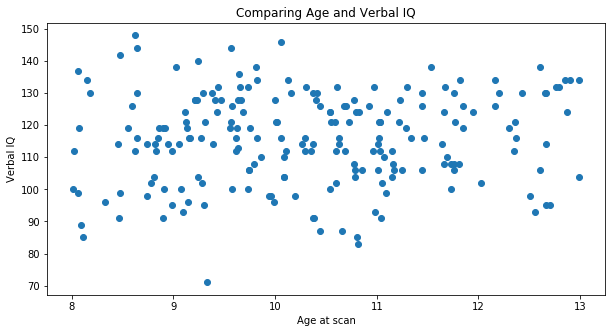

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(sub_df['age_at_scan '], sub_df.viq)
plt.xlabel('Age at scan')
plt.ylabel('Verbal IQ')
plt.title('Comparing Age and Verbal IQ');

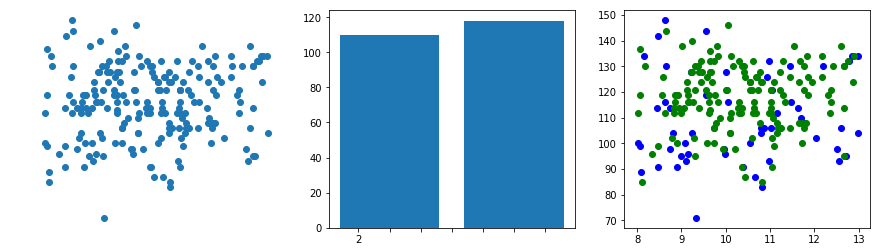

In [ ]:
# Set up a figure with 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Scatter plot in top left
axes[0].scatter(sub_df['age_at_scan '], sub_df['viq'])
axes[0].axis('off')

# Mean species petal widths in top right
means = sub_df.groupby('dx_group')['viq'].mean()
axes[1].bar(np.arange(len(means))+1, means)

# Note how **broken** this is without additional code
axes[1].set_xticklabels(means.index)

# More scatter plots, breaking up by species
colors = ['blue', 'green', 'red']
for i, (s, grp) in enumerate(sub_df.groupby('dx_group')):
    axes[2].scatter(grp['age_at_scan '], grp['viq'], c=colors[i])

## Exercise 2: 

Create a figure with a single axes and replot the scatterplot on the right to group by `sex` instead of `dx_group`. 
- Set the figure size to a ratio of 8 (wide) x 5 (height)
- Use the colors `red` and `gray`
- Set the opacity of the points to 0.5
- Label the axes
- Add a legend

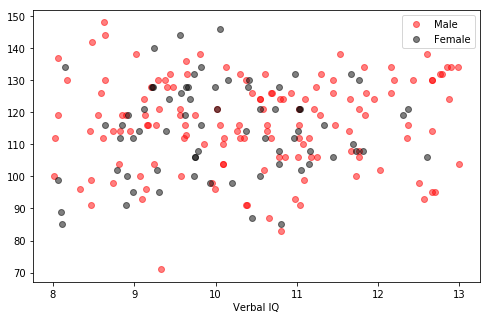

In [ ]:
# More scatter plots, breaking up by species
plt.figure(figsize=(8, 5))
colors = ['red', 'black']
for i, (s, grp) in enumerate(sub_df.groupby('sex')):
    plt.scatter(grp['age_at_scan '], grp['viq'], c=colors[i], alpha=0.5)
plt.xlabel('Age at scan')
plt.xlabel('Verbal IQ')
plt.legend(['Male', 'Female']);

In [ ]:
# Create solution here

#### You can reuse code directly from the matplotlib gallery.

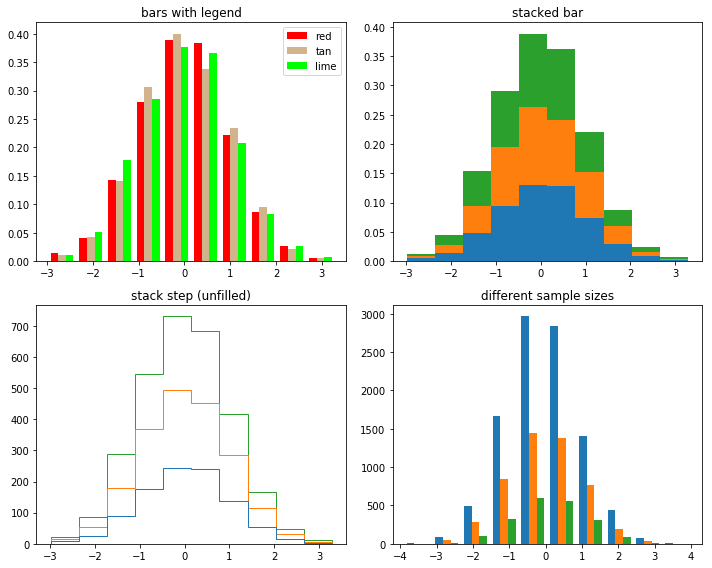

In [ ]:
# Adapted from https://matplotlib.org/gallery/statistics/histogram_multihist.html

import numpy as np
import matplotlib.pyplot as plt

n_bins = 10
x = np.random.randn(1000, 3)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
ax0, ax1, ax2, ax3 = axes.flatten()

colors = ['red', 'tan', 'lime']
ax0.hist(x, n_bins, density=1, histtype='bar', color=colors, label=colors)
ax0.legend(prop={'size': 10})
ax0.set_title('bars with legend')

ax1.hist(x, n_bins, density=1, histtype='bar', stacked=True)
ax1.set_title('stacked bar')

ax2.hist(x, n_bins, histtype='step', stacked=True, fill=False)
ax2.set_title('stack step (unfilled)')

# Make a multiple-histogram of data-sets with different length.
x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
ax3.hist(x_multi, n_bins, histtype='bar')
ax3.set_title('different sample sizes')

fig.tight_layout()
plt.show()

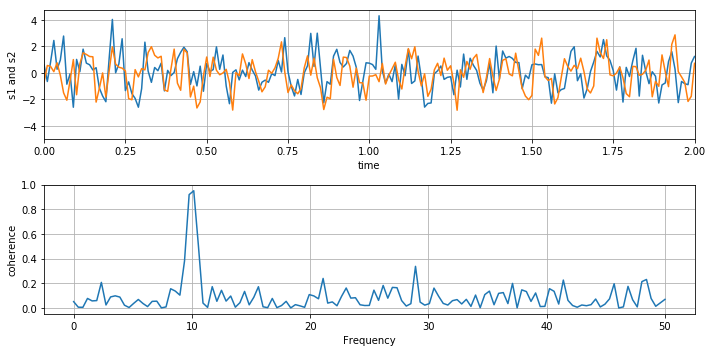

In [ ]:
# Adapted from https://matplotlib.org/gallery/lines_bars_and_markers/cohere.html

import numpy as np
import matplotlib.pyplot as plt

dt = 0.01
t = np.arange(0, 30, dt)
nse1 = np.random.randn(len(t))  # white noise 1
nse2 = np.random.randn(len(t))  # white noise 2

# Two signals with a coherent part at 10Hz and a random part
s1 = np.sin(2 * np.pi * 10 * t) + nse1
s2 = np.sin(2 * np.pi * 10 * t) + nse2

fig, axs = plt.subplots(2, 1, figsize=(10, 5))
axs[0].plot(t, s1, t, s2)
axs[0].set_xlim(0, 2)
axs[0].set_xlabel('time')
axs[0].set_ylabel('s1 and s2')
axs[0].grid(True)

cxy, f = axs[1].cohere(s1, s2, 256, 1. / dt)
axs[1].set_ylabel('coherence')

fig.tight_layout()
plt.show()

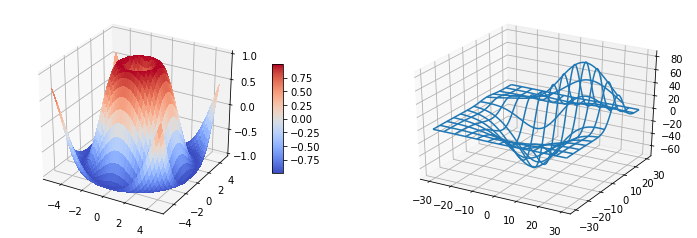

In [ ]:
# Demo taken from http://matplotlib.org/examples/mplot3d/subplot3d_demo.html

from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt

# imports specific to the plots in this example
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import get_test_data

# Twice as wide as it is tall.
fig = plt.figure(figsize=plt.figaspect(0.33))

#---- First subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim3d(-1.01, 1.01)

fig.colorbar(surf, shrink=0.5, aspect=10)

#---- Second subplot
ax = fig.add_subplot(1, 2, 2, projection='3d')
X, Y, Z = get_test_data(0.05)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10);

## Customization in matplotlib
* matplotlib is infinitely customizable
* As in most modern plotting environments, you can do virtually anything
* You just have to be willing to spend enough time on it

### Matplotlib styles
Taken from: https://twitter.com/rasbt/status/731205324187795457

<img src="https://raw.githubusercontent.com/rasbt/matplotlib-gallery/master/images/formatting_4.png">

## Matplotlib: pros
* Provides low-level control over virtually every element of a plot
* Completely object-oriented API; plot components can be easily modified
* Close integration with numpy
* Extremely active community
* Tons of functionality (figure compositing, layering, annotation, coordinate transformations, color mapping, etc.)

From [1](https://nbviewer.jupyter.org/github/neurohackweek/visualization-in-python/blob/58724f6ee08f33cffbbab11a1295c03a8379e9b7/visualization-in-python.ipynb) 

## Matplotlib: cons
* Steep learning curve
* API is extremely unpredictable -- redundancy and inconsistency are common
    * Some simple things are hard; some complex things are easy
* Lacks systematicity/organizing syntax--every plot is its own little world
* Simple plots often require a lot of code
* Default styles are kind of ugly
* The documentation... *why*?

From [1](https://nbviewer.jupyter.org/github/neurohackweek/visualization-in-python/blob/58724f6ee08f33cffbbab11a1295c03a8379e9b7/visualization-in-python.ipynb) 

# High-level interfaces to matplotlib
* Matplotlib is very powerful and very robust, but the API is hit-and-miss
* Many high-level interfaces to matplotlib have been written
    * Abstract away many of the annoying details
    * The best of both worlds: easy generation of plots, but retain MPL's power
* [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/index.html), [ggplot](http://ggplot.yhathq.com/), pandas, etc.
* Many domain-specific visualization tools are built on MPL (e.g., [nilearn](http://nilearn.github.io/plotting/index.html) in neuroimaging)

From [1](https://nbviewer.jupyter.org/github/neurohackweek/visualization-in-python/blob/58724f6ee08f33cffbbab11a1295c03a8379e9b7/visualization-in-python.ipynb) 

# `Pandas`
* Provides simple but powerful plotting tools
* DataFrame integration supports, e.g., groupby() calls for faceting
* Often the easiest approach for simple data exploration
* Arguably not as powerful, elegant, or intuitive as seaborn

In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns
iris = sns.load_dataset("iris")

In [ ]:
iris[::8]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
16,5.4,3.9,1.3,0.4,setosa
24,4.8,3.4,1.9,0.2,setosa
32,5.2,4.1,1.5,0.1,setosa
40,5.0,3.5,1.3,0.3,setosa
48,5.3,3.7,1.5,0.2,setosa
56,6.3,3.3,4.7,1.6,versicolor
64,5.6,2.9,3.6,1.3,versicolor
72,6.3,2.5,4.9,1.5,versicolor


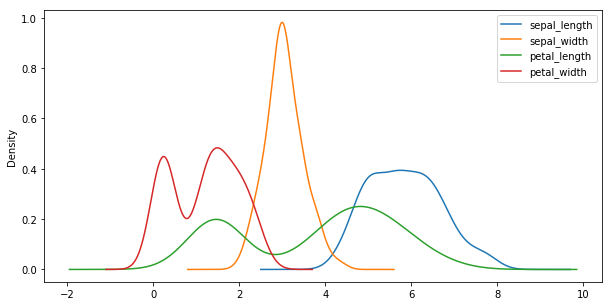

In [ ]:
# KDE plot of all iris attributes, collapsing over species
iris.plot(kind='kde', figsize=(10, 5))

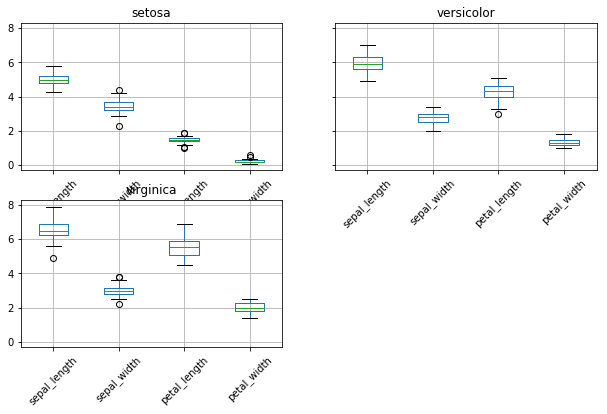

In [ ]:
# Separate boxplot of iris attributes for each species
iris.groupby('species').boxplot(rot=45, figsize=(10,6));

# Seaborn

Seaborn abstracts away many of the complexities to deal with such minutiae and provides a high level API for creating aesthetic plots. 

* Arguably the premier MPL interface for high-level plots
* Generates beautiful plots in very little code
    * Beautiful styles and color palettes
* Wide range of supported plots
* Modest support for structured plotting (via grids)
* Exceptional [documentation](https://stanford.edu/~mwaskom/software/seaborn/index.html)
* Generally the best place to start when exploring data
* Can be quite slow (e.g., with permutation)

From [1](https://nbviewer.jupyter.org/github/neurohackweek/visualization-in-python/blob/58724f6ee08f33cffbbab11a1295c03a8379e9b7/visualization-in-python.ipynb)

For example, the following command auto adjusts the setting for the figure to reflect what you are using the figure for.

In [ ]:
# Adjust the context of the plot
sns.set_context('poster') # http://seaborn.pydata.org/tutorial/aesthetics.html#scaling-plot-elements
sns.set_palette('pastel') # http://seaborn.pydata.org/tutorial/color_palettes.html

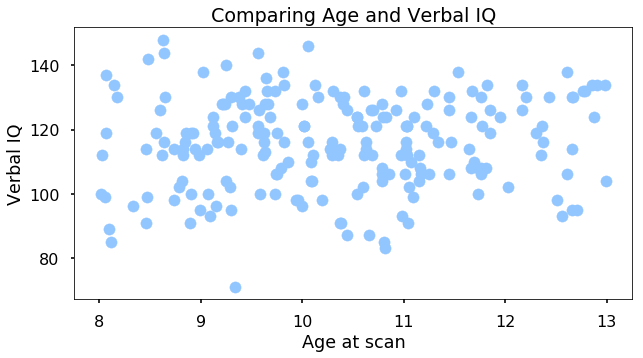

In [ ]:
# But still use matplotlib to do the plotting

plt.figure(figsize=(10, 5))
plt.scatter(sub_df['age_at_scan '], sub_df.viq)
plt.xlabel('Age at scan')
plt.ylabel('Verbal IQ')
plt.title('Comparing Age and Verbal IQ');

## Exercise: 3: Compare the figure above to the previous figure. What is different?

- The font size of each label
- The size of the points
- The color palette

Now let's redo the scatter plot in seaborn style.

/home/line/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


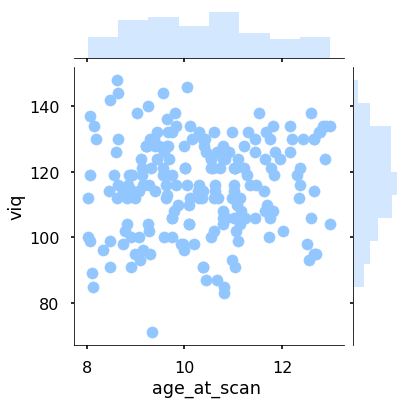

In [ ]:
sns.jointplot(x='age_at_scan ', y='viq', data=sub_df, stat_func=None);

## Exercise 4: 

Given the dataset we are using, what would you change to provide a better understanding of the data.

Information about:

- Diagnosis
- Sex

should be encoded separately.

One way to do this with seaborn is to use a more general interface called the [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid).

Let's replot the figure while learning about a few new commands.

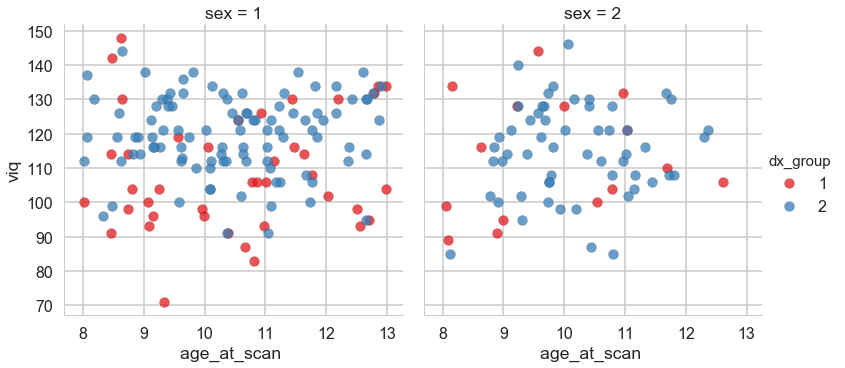

In [ ]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.set_context('poster')

kws = dict(s=100, alpha=0.75, linewidth=0.15, edgecolor="k")

g = sns.FacetGrid(sub_df, col="sex", hue="dx_group", palette="Set1",
                  hue_order=[1, 2], size=5.5)
g = (g.map(plt.scatter, "age_at_scan ", "viq", **kws).add_legend())

With just a few lines of code, note how much control you have over the figure.

## Exercise 5:

Using a [pairwise plot](http://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot), compare the distributions of `age`, `viq`, and `piq` with respect to `dx_group`.

- Set a palette
- Set style to `ticks`
- Suppress the `dx_group` variable from being on the plot

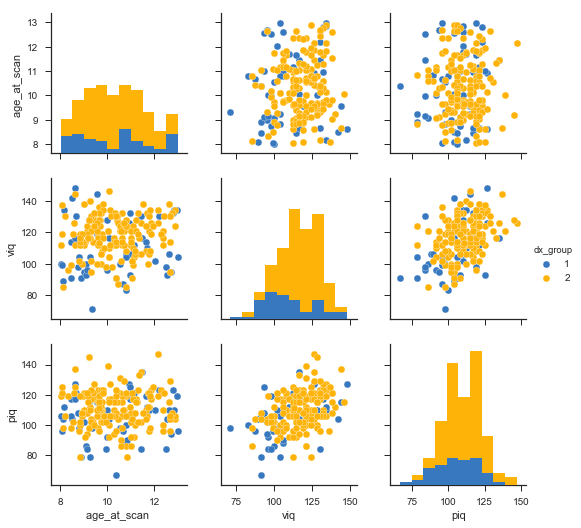

In [ ]:
sns.set_context('poster')
sns.set(style="ticks")
sns.set_palette(sns.xkcd_palette(["windows blue", "amber"]))
sns.pairplot(df[['age_at_scan ', 'viq', 'piq', 'dx_group']], vars=['age_at_scan ', 'viq', 'piq'], hue="dx_group");

In [ ]:
# Create solution here

## Exercise 6:

Using a [violin plot](http://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot) separate out `viq` as a function of `sex` and `dx_group`.

- Different `dx_group` should be on each half of each violin
- The x-axis should reflect the different `sex` categories.

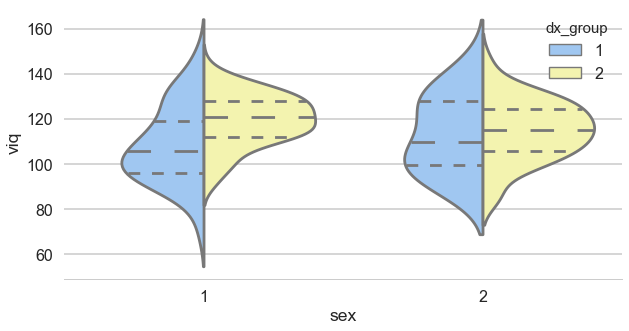

In [ ]:
# Draw a nested violinplot and split the violins for easier comparison
sns.set(style="whitegrid", palette="pastel", color_codes=True, rc={"figure.figsize": (10, 5)})
sns.set_context('poster')
sns.violinplot(x="sex", y="viq", hue="dx_group", data=sub_df, split=True,
               inner="quart", palette={1: "b", 2: "y"})
sns.despine(left=True)

In [ ]:
# Create solution here

## From the Gallery

You can reuse code directly from the [seaborn gallery](https://seaborn.pydata.org/examples/index.html).

/home/line/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


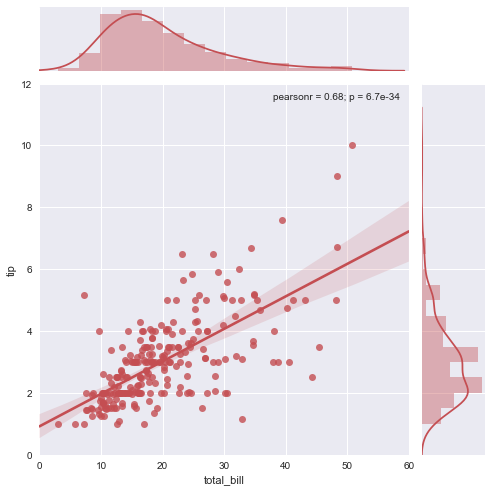

In [ ]:
# Adapted from http://seaborn.pydata.org/examples/regression_marginals.html

import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

tips = sns.load_dataset("tips")
g = sns.jointplot("total_bill", "tip", data=tips, kind="reg",
                  xlim=(0, 60), ylim=(0, 12), color="r", size=7)

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


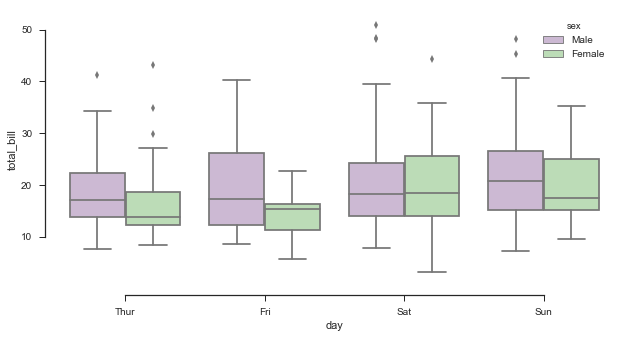

In [ ]:
# Adapted from http://seaborn.pydata.org/examples/grouped_boxplot.html

import seaborn as sns
sns.set(style="ticks")

# Load the example tips dataset
tips = sns.load_dataset("tips")

print(tips.head())

# Draw a nested boxplot to show bills by day and sex
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips, palette="PRGn")
sns.despine(offset=10, trim=True, )

/home/line/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


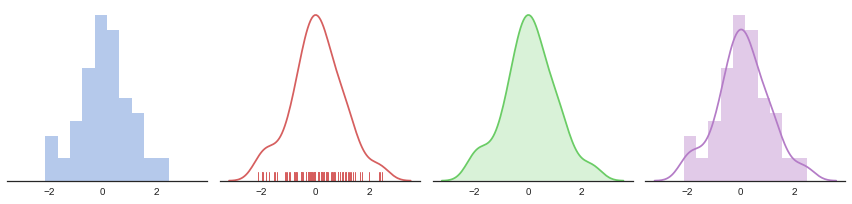

In [ ]:
# Adapted from http://seaborn.pydata.org/examples/distplot_options.html

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)

# Set up the matplotlib figure
f, axes = plt.subplots(1, 4, figsize=(12, 3), sharex=True)
sns.despine(left=True)

# Generate a random univariate dataset
d = rs.normal(size=100)

# Plot a simple histogram with binsize determined automatically
sns.distplot(d, kde=False, color="b", ax=axes[0])

# Plot a kernel density estimate and rug plot
sns.distplot(d, hist=False, rug=True, color="r", ax=axes[1])

# Plot a filled kernel density estimate
sns.distplot(d, hist=False, color="g", kde_kws={"shade": True}, ax=axes[2])

# Plot a historgram and kernel density estimate
sns.distplot(d, color="m", ax=axes[3])

plt.setp(axes, yticks=[])
plt.tight_layout()

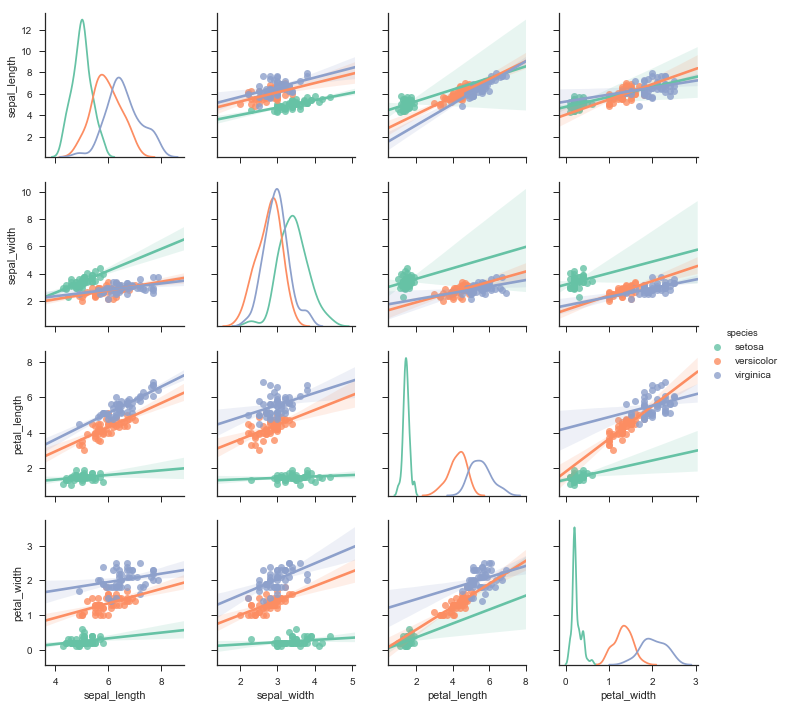

In [ ]:
# Adapted from https://seaborn.pydata.org/tutorial/axis_grids.html

import seaborn as sns
sns.set(style="ticks")

iris = sns.load_dataset("iris")
g = sns.pairplot(iris, hue="species", palette="Set2", kind='reg',
                 diag_kind="kde", size=2.5)

/home/line/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


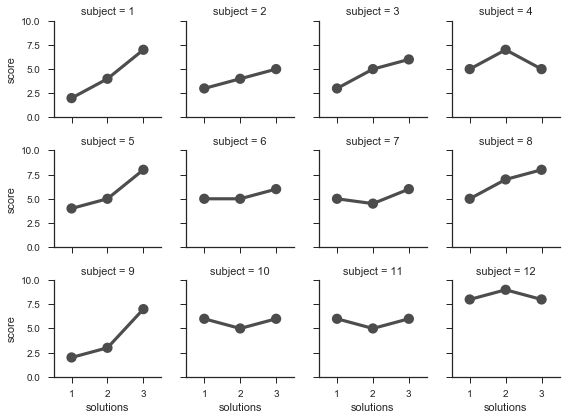

In [ ]:
# Adapted from https://seaborn.pydata.org/tutorial/axis_grids.html

attend = sns.load_dataset("attention").query("subject <= 12")
g = sns.FacetGrid(attend, col="subject", col_wrap=4, size=2, ylim=(0, 10))
g.map(sns.pointplot, "solutions", "score", color=".3", ci=None);

# Alternatives to matplotlib
* You don't *have* to use MPL
* Some good reasons to use alternatives:
    * You want to output to HTML, SVG, etc.
    * You want something that plays well with other specs or isn't tied to Python
    * You hate matplotlib
* Good news! You have many options...
    * bokeh, plotly, HoloViews, Altair...

# `Bokeh`
* A Python visualization engine that outputs directly to the web
* Can render MPL plots to Bokeh, but not vice versa
* Lets you generate [interactive web-based visualizations](https://demo.bokehplots.com/apps/movies) in pure Python (!)
* You get interactivity for free, and can easily customize them
* Works seamlessly in Jupyter notebooks
* Package development is _incredibly_ fast
* Biggest drawback may be the inability to output static images

In [1]:
# Adapted from http://bokeh.pydata.org/en/latest/docs/gallery/iris.html

from bokeh.plotting import figure, show, output_notebook
from bokeh.sampledata.iris import flowers

output_notebook()

colormap = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
colors = [colormap[x] for x in flowers['species']]

p = figure(title = "Iris Morphology")
p.xaxis.axis_label = 'Petal Length'
p.yaxis.axis_label = 'Petal Width'

p.circle(flowers["petal_length"], flowers["petal_width"],
         color=colors, fill_alpha=0.2, size=10)

show(p)

Loading BokehJS ...

In [2]:
import numpy as np

from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource
from bokeh.sampledata.les_mis import data

output_notebook()

nodes = data['nodes']
names = [node['name'] for node in sorted(data['nodes'], key=lambda x: x['group'])]

N = len(nodes)
counts = np.zeros((N, N))
for link in data['links']:
    counts[link['source'], link['target']] = link['value']
    counts[link['target'], link['source']] = link['value']

colormap = ["#444444", "#a6cee3", "#1f78b4", "#b2df8a", "#33a02c", "#fb9a99",
            "#e31a1c", "#fdbf6f", "#ff7f00", "#cab2d6", "#6a3d9a"]

xname = []
yname = []
color = []
alpha = []
for i, node1 in enumerate(nodes):
    for j, node2 in enumerate(nodes):
        xname.append(node1['name'])
        yname.append(node2['name'])

        alpha.append(min(counts[i,j]/4.0, 0.9) + 0.1)

        if node1['group'] == node2['group']:
            color.append(colormap[node1['group']])
        else:
            color.append('lightgrey')

source = ColumnDataSource(data=dict(xname=xname, yname=yname, colors=color,
                                    alphas=alpha, count=counts.flatten()))

p = figure(title="Les Mis Occurrences",
           x_axis_location="above", tools="hover,save",
           x_range=list(reversed(names)), y_range=names)

p.plot_width = 800
p.plot_height = 800
p.grid.grid_line_color = None
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "5pt"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = np.pi/3

p.rect('xname', 'yname', 0.9, 0.9, source=source,
       color='colors', alpha='alphas', line_color=None,
       hover_line_color='black', hover_color='colors')

p.select_one(HoverTool).tooltips = [('names', '@yname, @xname'),
                                    ('count', '@count')]

show(p) # show the plot

Loading BokehJS ...

# `Plot.ly`
* [Plot.ly](https://plot.ly/python/) fills the same niche as Bokeh - web-based visualization via other languages
* Lets you build visualizations either in native code or online

In [ ]:
# Adapted from https://plot.ly/python/ipython-notebook-tutorial/

import plotly
plotly.offline.init_notebook_mode()
import plotly.plotly as py
import plotly.figure_factory as ff
from plotly.graph_objs import *

import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/school_earnings.csv")
table = ff.create_table(df)

trace_women = Bar(x=df.School, y=df.Women, name='Women', marker=dict(color='#ffcdd2'))
trace_men = Bar(x=df.School, y=df.Men, name='Men', marker=dict(color='#A2D5F2'))
trace_gap = Bar(x=df.School, y=df.Gap, name='Gap', marker=dict(color='#59606D'))

data = [trace_women, trace_men, trace_gap]
layout = Layout(title="Average Earnings for Graduates",
                xaxis=dict(title='School'),
                yaxis=dict(title='Salary (in thousands)'))
fig = Figure(data=data, layout=layout)

plotly.offline.iplot(fig)

In [ ]:
# Adapted from https://plot.ly/python/line-and-scatter/

import plotly
plotly.offline.init_notebook_mode()
import plotly.plotly as py
import plotly.graph_objs as go

# Create random data with numpy
import numpy as np

N = 100
random_x = np.linspace(0, 1, N)
random_y0 = np.random.randn(N) + 5
random_y1 = np.random.randn(N)
random_y2 = np.random.randn(N) - 5

# Create traces
trace0 = go.Scatter(x=random_x, y=random_y0, mode='lines', name='lines')
trace1 = go.Scatter(x=random_x, y=random_y1, mode='lines+markers', name='lines+markers')
trace2 = go.Scatter(x=random_x, y=random_y2, mode='markers', name='markers')
data = [trace0, trace1, trace2]

plotly.offline.iplot(data, filename='line-mode')

In [ ]:
# Adapted from https://plot.ly/python/continuous-error-bars/

import plotly
plotly.offline.init_notebook_mode()
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/wind_speed_laurel_nebraska.csv')

upper_bound = go.Scatter(
    name='Upper Bound', x=df['Time'], y=df['10 Min Sampled Avg'] + df['10 Min Std Dev'], mode='lines',
    marker=dict(color="444"), line=dict(width=0), fillcolor='rgba(68, 68, 68, 0.3)', fill='tonexty')

trace = go.Scatter(
    name='Measurement', x=df['Time'], y=df['10 Min Sampled Avg'], mode='lines',
    line=dict(color='rgb(31, 119, 180)'), fillcolor='rgba(68, 68, 68, 0.3)', fill='tonexty')

lower_bound = go.Scatter(
    name='Lower Bound', x=df['Time'], y=df['10 Min Sampled Avg']-df['10 Min Std Dev'],
    marker=dict(color="444"), line=dict(width=0), mode='lines')

# Trace order can be important with continuous error bars
data = [lower_bound, trace, upper_bound]

layout = go.Layout(yaxis=dict(title='Wind speed (m/s)'),
                   title='Continuous, variable value error bars.', showlegend = False)

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig, filename='pandas-continuous-error-bars')

In [ ]:
# Adapted from https://plot.ly/python/3d-surface-plots/

import plotly
plotly.offline.init_notebook_mode()
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd

# Read data from a csv
z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')

data = [go.Surface(z=z_data.as_matrix())]
layout = go.Layout(autosize=True, width=500, height=500, margin=dict(l=65, r=50, b=65, t=90))
fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig)

# `HoloViews`

[HoloViews](http://holoviews.org/) - I don't know it, but it looks pretty nice?

In [ ]:
# Adapted from http://holoviews.org/gallery/demos/bokeh/iris_splom_example.html#bokeh-gallery-iris-splom-example

import numpy as np
import holoviews as hv
hv.extension('bokeh')

# Declaring data 
from bokeh.sampledata.iris import flowers
from holoviews.operation import gridmatrix

ds = hv.Dataset(flowers)

grouped_by_species = ds.groupby('species', container_type=hv.NdOverlay)
grid = gridmatrix(grouped_by_species, diagonal_type=hv.Scatter)

# Plot 
plot_opts = dict(tools=['hover', 'box_select'], bgcolor='#efe8e2')
style = dict(fill_alpha=0.2, size=4)

grid({'Scatter': {'plot': plot_opts, 'style': style}})

In [ ]:
# Adapted from http://holoviews.org/gallery/demos/bokeh/mandelbrot_section.html#bokeh-gallery-mandelbrot-section

import numpy as np
import holoviews as hv
hv.extension('bokeh')

# Load the data 
import io
try:    from urllib2 import urlopen
except: from urllib.request import urlopen

raw = urlopen('http://assets.holoviews.org/data/mandelbrot.npy').read()
array = np.load(io.BytesIO(raw)).astype(np.float32)[::4,::4]

In [ ]:
%%opts Points [scaling_factor=50] Contours [show_legend=False] (color='w')
dots = np.linspace(-0.45, 0.45, 19)
fractal = hv.Image(array)
# First example on the old holoviews.org homepage was:
# ((fractal * hv.HLine(y=0)).hist() + fractal.sample(y=0))
layouts = {y: (fractal * hv.Points(fractal.sample([(i,y) for i in dots])) +
               fractal.sample(y=y) +
               hv.operation.threshold(fractal, level=np.percentile(fractal.sample(y=y)['z'], 90)) +
               hv.operation.contours(fractal, levels=[np.percentile(fractal.sample(y=y)['z'], 60)]))
            for y in np.linspace(-0.4, 0.4, 10)} # Half the frames of the bokeh version

hv.HoloMap(layouts, kdims='Y').collate().cols(2)

In [ ]:
# Adapted from http://holoviews.org/gallery/demos/bokeh/measles_example.html#bokeh-gallery-measles-example

import numpy as np
import holoviews as hv
import pandas as pd
hv.extension('bokeh')

# Declaring data 
url = 'https://raw.githubusercontent.com/blmoore/blogR/master/data/measles_incidence.csv'
data = pd.read_csv(url, skiprows=2, na_values='-')

yearly_data = data.drop('WEEK', axis=1).groupby('YEAR').sum().reset_index()
measles = pd.melt(yearly_data, id_vars=['YEAR'], var_name='State', value_name='Incidence')

heatmap = hv.HeatMap(measles, label='Measles Incidence')
aggregate = hv.Dataset(heatmap).aggregate('YEAR', np.mean, np.std)

vline = hv.VLine(1963)
marker = hv.Text(1964, 800, 'Vaccine introduction', halign='left')

agg = hv.ErrorBars(aggregate) * hv.Curve(aggregate)

# Plot 
hm_opts = dict(width=900, height=500, tools=['hover'], logz=True, invert_yaxis=True,
            xrotation=90, labelled=[], toolbar='above', xaxis=None)
overlay_opts = dict(width=900, height=200, show_title=False)
vline_opts = dict(line_color='black')

opts = {'HeatMap': {'plot': hm_opts}, 'Overlay': {'plot': overlay_opts}, 'VLine': {'style': vline_opts}}

(heatmap + agg * vline * marker).opts(opts).cols(1)

# Altair
* "A declarative statistical visualization library for Python"
* Similar philosophy to ggplot2, in that it's based on a generative syntax
* Altair itself doesn't do any plotting
    * Produces a Vega-Lite JSON specification
    * Completely portable
* Looks very promising, but still in early stages of development

From [1](https://nbviewer.jupyter.org/github/neurohackweek/visualization-in-python/blob/58724f6ee08f33cffbbab11a1295c03a8379e9b7/visualization-in-python.ipynb)

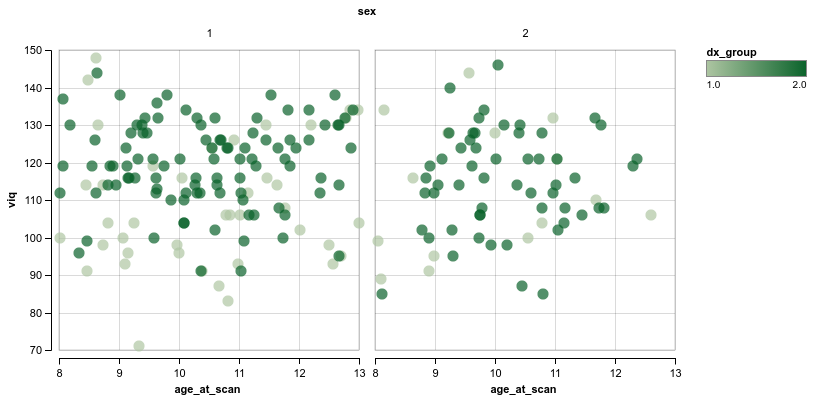

In [ ]:
from altair import Chart, X, Y, Scale, Color

Chart(sub_df).mark_circle(opacity=0.7, size=100).encode(
    column='sex',
    x=X('age_at_scan ',
        scale=Scale(
            zero=False,
        )),
    y=Y('viq',
        scale=Scale(
            zero=False,
        )),
    color='dx_group',
).configure_cell(
    height=300.0,
    width=300.0,
)

## Exercise 7:

Use the Altair gallery to perform a binned scatterplot of age and IQ.

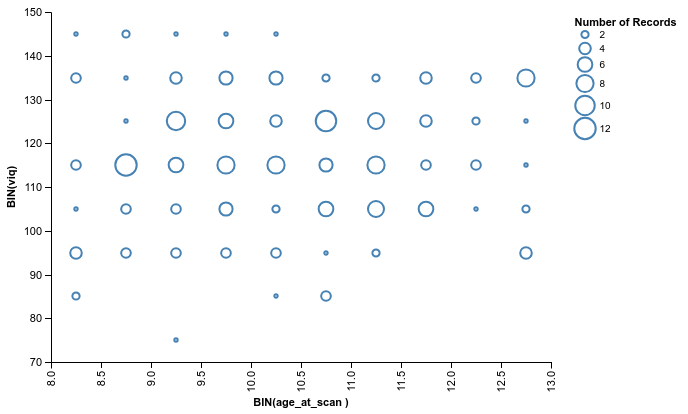

In [ ]:
from altair import Bin

Chart(sub_df).mark_point().encode(
    size='count(*):Q',
    x=X('age_at_scan :Q',
        bin=Bin(
            maxbins=10.0,
        ),
    ),
    y=Y('viq:Q',
        bin=Bin(
            maxbins=10.0,
        ),
    ),
)

In [ ]:
# Create solution here

# So... what should you use?
* I have no idea--there are too many options!
* Okay, some tentative recommendations:
    * Use seaborn for exploration (runners-up: pandas and ggplot)
    * Bokeh or plot.ly if you want to output interactive visualizations to the web
    * For everything else... matplotlib (still)
    * Keep an eye on others like HoloViews and Altair